# Importing required libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from collections import Counter

# Importing shifted wobble dataset

In [11]:
#get the final output data for the standard wobble
std_df= pd.read_csv('../../../results/all_standard_wobble_redundancy_checked.csv')

#get the final output data for the shifted wobble
sw_df= pd.read_csv('../../../results/all_shifted_wobble_with_non_WCF_interaction.csv')

#non-redundant standard wobble
std_df1= std_df[std_df['representative']==1]
std_df1.index= np.arange(0, len(std_df1))

#non-redundant shifted wobble
sw_df1= sw_df[sw_df['representative']==1]
sw_df1.index= np.arange(0, len(sw_df1))

In [12]:
all_distances= ['O6_O4_dis', 'O6_N3_dis', 'O6_O2_dis', 'N1_O4_dis', 'N1_N3_dis', 'N1_O2_dis', 'N2_O4_dis', 'N2_N3_dis', 'N2_O2_dis']

all_dist_dict= {all_distances[i]: all_distances[i]+' ' for i in range(len(all_distances))}
#print (all_dist_dict)

std_df1.rename(columns = all_dist_dict, inplace = True)

print (std_df1.columns)

Index(['Unnamed: 0', 'PDB_ID', 'Experimental_Method', 'Resolution_(Å)',
       'chain_ID', 'seg_ID', 'Source_Organism_chain', 'Molecule',
       'Source_Organism_all', 'Expressed_Organism', 'Chain_length_reference',
       'data_ext', 'res_index_res1', 'bp_notation', 'res_ID_res1',
       'res_index_res2', 'res_ID_res2', 'bp_res', 'Name', 'Saenger', 'LW',
       'DSSR', 'bp_ID', 'b_resG', 'b_resU', 'b_comb', 'O6_O4_dih', 'C1_dis',
       'C1_dih', 'N1_O2_dis ', 'N1_N3_dis ', 'N1_O4_dis ', 'N2_O2_dis ',
       'N2_N3_dis ', 'N2_O4_dis ', 'O6_O2_dis ', 'O6_N3_dis ', 'O6_O4_dis ',
       'O6_N3_dih', 'N1_O2_dih', 'Chain_length_structure', 'pdb_chain',
       'mol_org', 'pdb_adj_res1', 'pdb_adj_res2', 'ref_pdb_chain', 'adj_res1',
       'adj_res2', 'flank1', 'flank2', 'red_group_ID',
       'number_of_group_members', 'representative'],
      dtype='object')


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_61245/813264017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_df1.rename(columns = all_dist_dict, inplace = True)


In [13]:
print (list(sw_df1.columns))

['Unnamed: 0', 'PDB_ID', 'Experimental_Method', 'Resolution_(Å)', 'chain_ID', 'seg_ID', 'Source_Organism_chain', 'Molecule', 'Source_Organism_all', 'Expressed_Organism', 'Chain_length_reference', 'data_ext', 'res_index_res1', 'bp_notation', 'res_ID_res1', 'res_index_res2', 'res_ID_res2', 'bp_res', 'name', 'Saenger', 'LW', 'DSSR', 'bp_ID', 'b_resG', 'b_resU', 'b_comb', 'O6_O4_dih', 'C1_dis', 'C1_dih', 'N1_O2_dis', 'N1_N3_dis', 'N1_O4_dis', 'N2_O2_dis', 'N2_N3_dis', 'N2_O4_dis', 'O6_O2_dis', 'O6_N3_dis', 'O6_O4_dis', 'N1_O4_dih', 'N2_N3_dih', 'Chain_length_structure', 'ref_org', 'pdb_adj_res1', 'pdb_adj_res2', 'flank1', 'flank2', 'ref_pdb_chain', 'adj_res1', 'adj_res2', 'red_group_ID', 'number_of_group_members', 'missing_res_atoms', 'RMSD_to_avg', 'representative', 'Median_map_model_cc', 'Mean_map_model_cc', 'Raw_map_model_cc_for_the_G', 'Normalized_map_model_cc_for_the_G', 'Percentile_cc_for_the_G', 'Raw_map_model_cc_for_the_U', 'Normalized_map_model_cc_for_the_U', 'Percentile_cc_for_th

In [14]:
emt_cls=[]

for i in range(1, 17):
    x1= np.repeat(' ', i)
    x2= ''.join(x1)
    emt_cls.append(x2)

print (len(emt_cls))
print ((emt_cls))
emt_df = pd.DataFrame(columns= emt_cls)
print (emt_df)

16
[' ', '  ', '   ', '    ', '     ', '      ', '       ', '        ', '         ', '          ', '           ', '            ', '             ', '              ', '               ', '                ']
Empty DataFrame
Columns: [ ,   ,    ,     ,      ,       ,        ,         ,          ,           ,            ,             ,              ,               ,                ,                 ]
Index: []


/var/folders/wh/29t7h4rn1jg5ss_v64_j72jc0000gn/T/ipykernel_61245/2341136268.py:3: UserWarning: The palette list has more values (35) than needed (34), which may not be intended.
  fig= sns.stripplot(data= [std_df1['O6_O4_dis '], sw_df1['O6_O4_dis'], emt_df[emt_cls[0]], emt_df[emt_cls[1]], std_df1['O6_N3_dis '], sw_df1['O6_N3_dis'], emt_df[emt_cls[2]], emt_df[emt_cls[3]], std_df1['O6_O2_dis '], sw_df1['O6_O2_dis'], emt_df[emt_cls[4]], emt_df[emt_cls[5]],


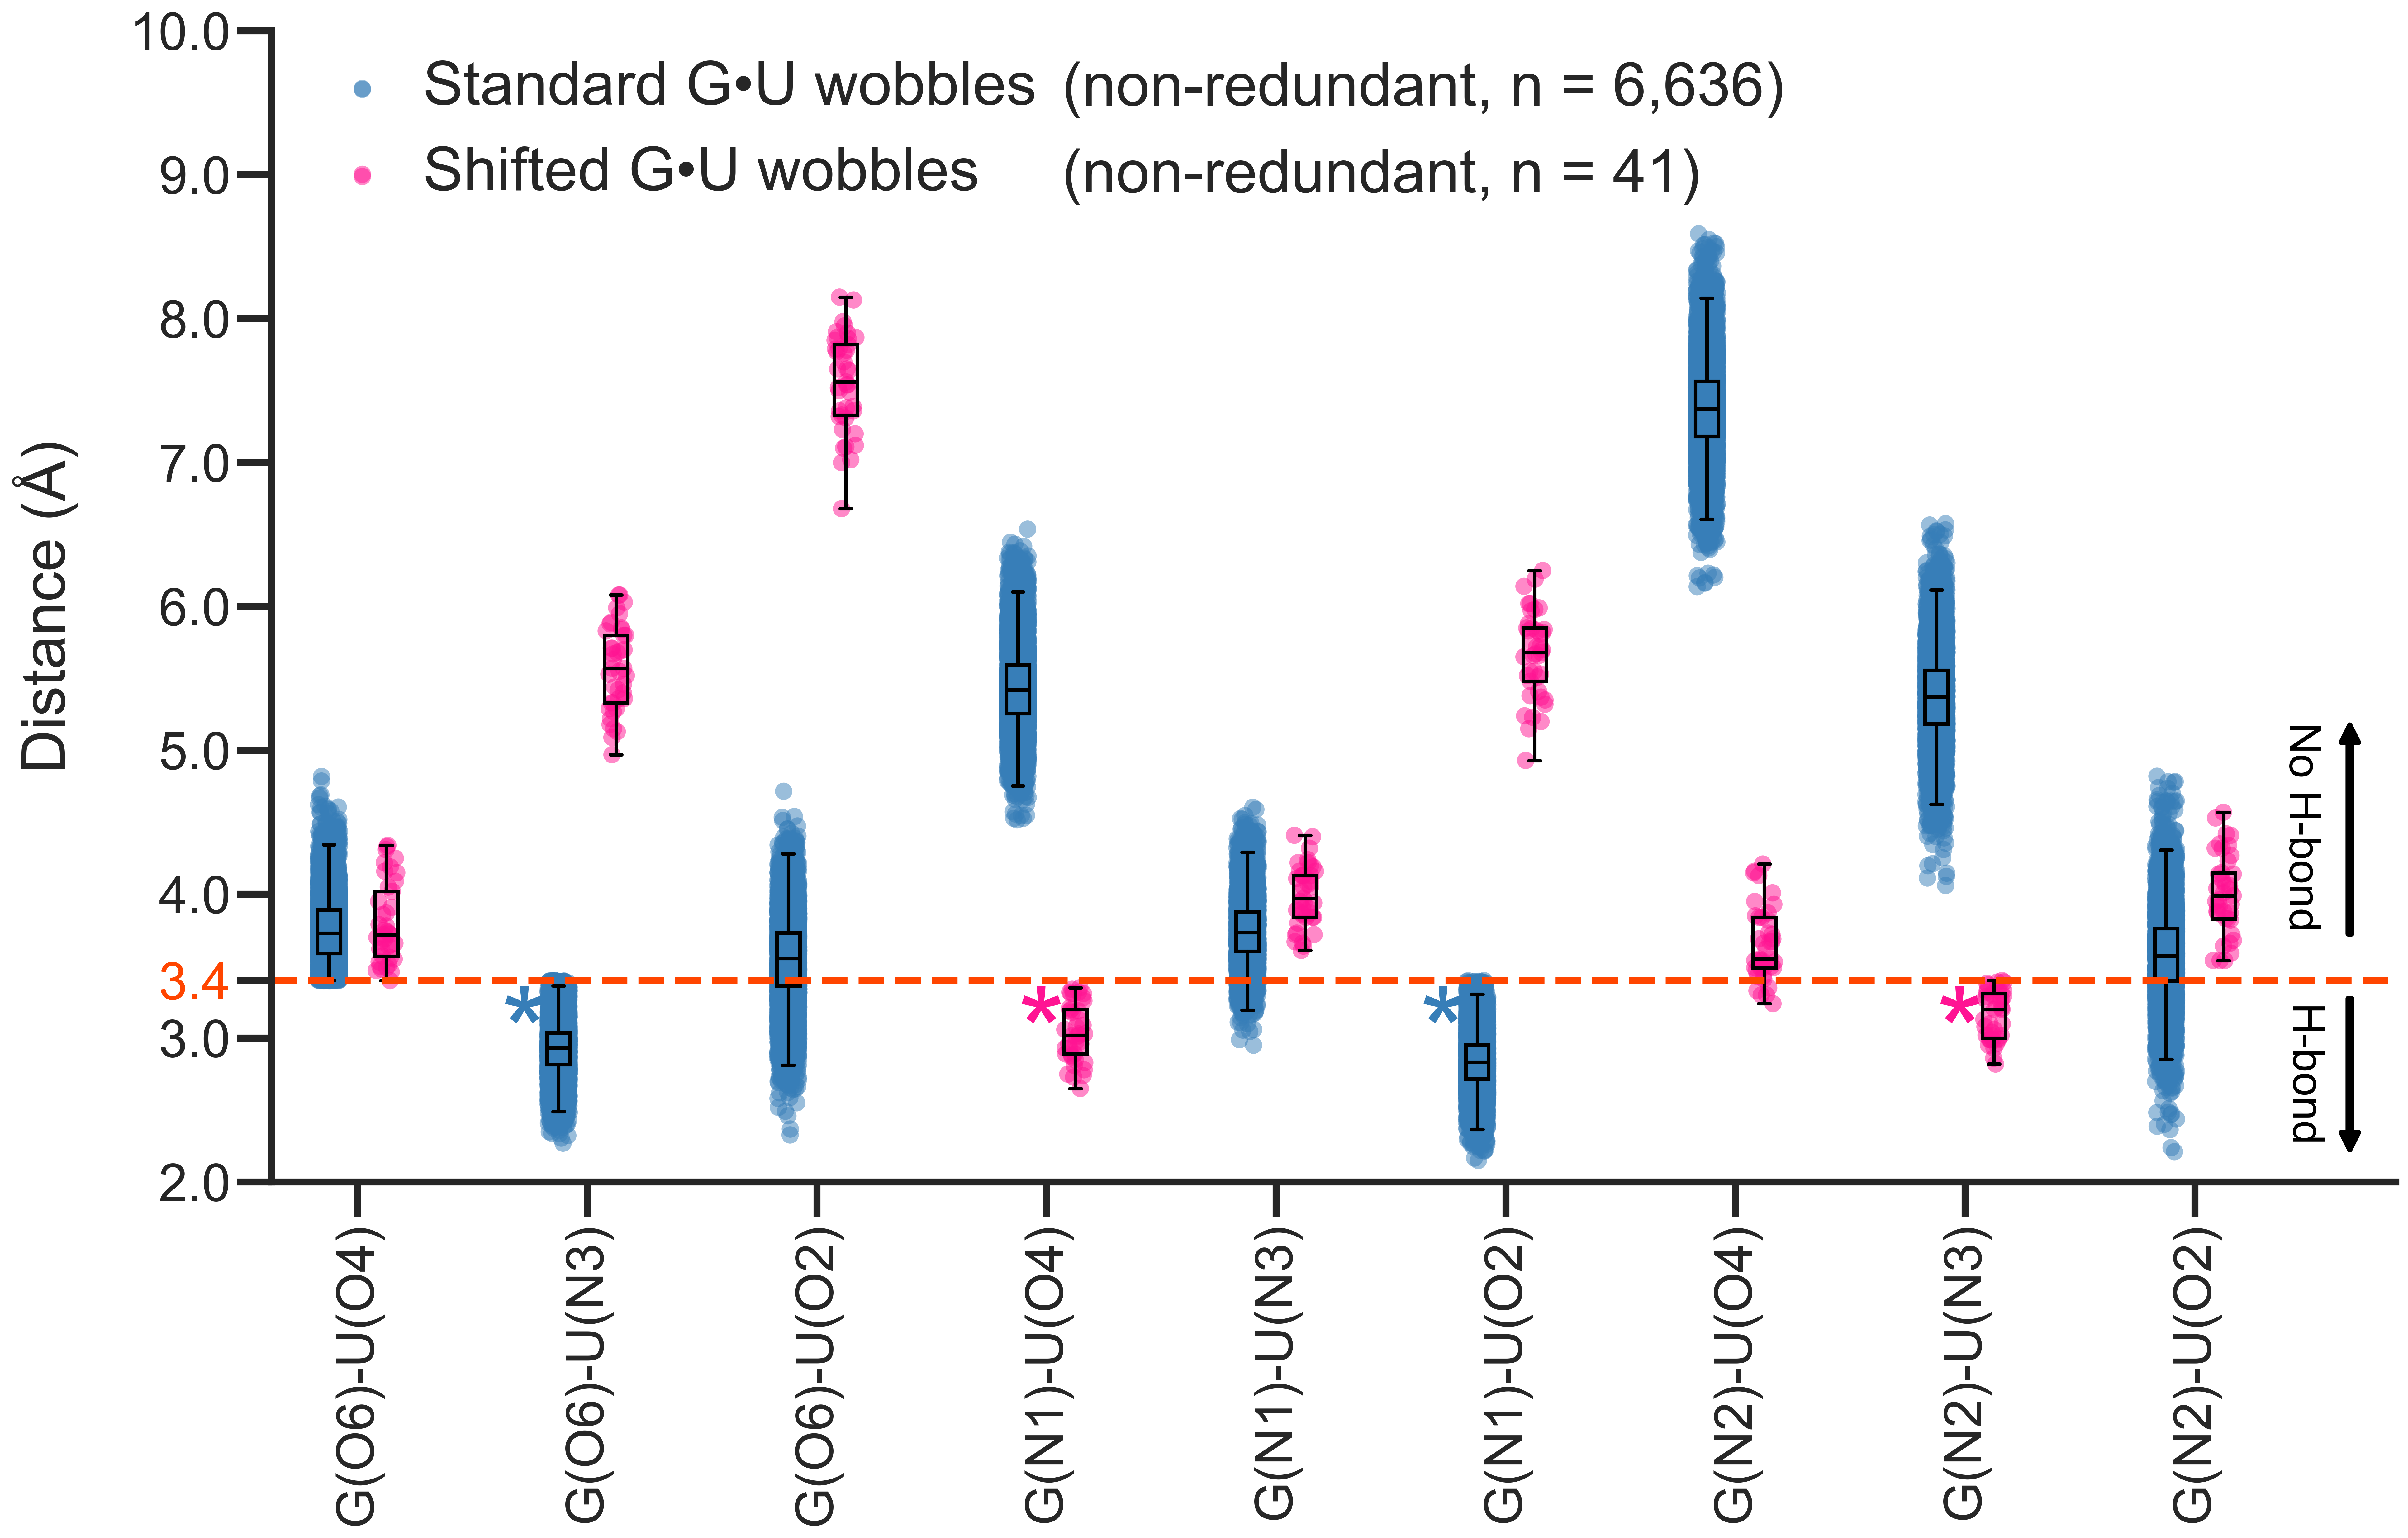

In [43]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (22,12), dpi = 400)
fig= sns.stripplot(data= [std_df1['O6_O4_dis '], sw_df1['O6_O4_dis'], emt_df[emt_cls[0]], emt_df[emt_cls[1]], std_df1['O6_N3_dis '], sw_df1['O6_N3_dis'], emt_df[emt_cls[2]], emt_df[emt_cls[3]], std_df1['O6_O2_dis '], sw_df1['O6_O2_dis'], emt_df[emt_cls[4]], emt_df[emt_cls[5]],
                          std_df1['N1_O4_dis '], sw_df1['N1_O4_dis'], emt_df[emt_cls[6]], emt_df[emt_cls[7]], std_df1['N1_N3_dis '], sw_df1['N1_N3_dis'], emt_df[emt_cls[8]], emt_df[emt_cls[9]], std_df1['N1_O2_dis '], sw_df1['N1_O2_dis'], emt_df[emt_cls[10]], emt_df[emt_cls[11]],
                          std_df1['N2_O4_dis '], sw_df1['N2_O4_dis'], emt_df[emt_cls[12]], emt_df[emt_cls[13]], std_df1['N2_N3_dis '], sw_df1['N2_N3_dis'], emt_df[emt_cls[14]], emt_df[emt_cls[15]], std_df1['N2_O2_dis '], sw_df1['N2_O2_dis']], 
                          size= 10, jitter=0.185, alpha=0.5,  zorder=1, dodge= False,
                          palette=['#377eb8','deeppink','W', 'W', '#377eb8','deeppink','W', 'W','#377eb8','deeppink','W','W',
                                   '#377eb8','deeppink','W', 'W','#377eb8','deeppink','W', 'W','#377eb8','deeppink','W','W',
                                   '#377eb8','deeppink','W', 'W','#377eb8','deeppink','W','W','#377eb8','deeppink','W'])
PROPS = {
    'boxprops':{'facecolor':'None', 'edgecolor':'black', 'zorder':2},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
fig= sns.boxplot(data= [std_df1['O6_O4_dis '], sw_df1['O6_O4_dis'], emt_df[emt_cls[0]], emt_df[emt_cls[1]], std_df1['O6_N3_dis '], sw_df1['O6_N3_dis'], emt_df[emt_cls[2]], emt_df[emt_cls[3]], std_df1['O6_O2_dis '], sw_df1['O6_O2_dis'], emt_df[emt_cls[4]], emt_df[emt_cls[5]],
                          std_df1['N1_O4_dis '], sw_df1['N1_O4_dis'], emt_df[emt_cls[6]], emt_df[emt_cls[7]], std_df1['N1_N3_dis '], sw_df1['N1_N3_dis'], emt_df[emt_cls[8]], emt_df[emt_cls[9]], std_df1['N1_O2_dis '], sw_df1['N1_O2_dis'], emt_df[emt_cls[10]], emt_df[emt_cls[11]],
                          std_df1['N2_O4_dis '], sw_df1['N2_O4_dis'], emt_df[emt_cls[12]], emt_df[emt_cls[13]], std_df1['N2_N3_dis '], sw_df1['N2_N3_dis'], emt_df[emt_cls[14]], emt_df[emt_cls[15]], std_df1['N2_O2_dis '], sw_df1['N2_O2_dis']],
                          **PROPS, width=0.4, linewidth= 2,  showfliers=False)
plt.xlim(-1, 36.0)
plt.xticks(ticks=[0.5, 4.5, 8.5, 12.5, 16.5, 20.5, 24.5, 28.5, 32.5], 
           labels= ['G(O6)-U(O4)', 'G(O6)-U(N3)', 'G(O6)-U(O2)',
                    'G(N1)-U(O4)', 'G(N1)-U(N3)', 'G(N1)-U(O2)',
                    'G(N2)-U(O4)', 'G(N2)-U(N3)', 'G(N2)-U(O2)'], 
           rotation=90, fontsize = 30)

##plt.yticks(ticks=[2, 3, 3.4, 4, 5, 6, 7, 8, 9, 10], fontsize = 30)

plt.tick_params(axis='both', width=4, length=20)

#adding gray stripes to separate distribution of different datasets
##plt.axvspan(2.5, 6.5, facecolor ="#999999", alpha=0.1)
##plt.axvspan(10.5, 14.5, facecolor ="#999999", alpha=0.1)
##plt.axvspan(18.5, 22.5, facecolor ="#999999", alpha=0.1)
##plt.axvspan(26.5, 30.5, facecolor ="#999999", alpha=0.1)

#adding asterisk sign for the distances of the corresponding hbonds in standard and shifted wobbles
plt.text(3.0, 2.75, '*', fontsize=70, color='#377eb8') #for the 'G(O6)-U(N3)' hbond in standard wobble
plt.text(19.00, 2.75, '*', fontsize=70, color='#377eb8') #for the 'G(N1)-U(O2)' hbond in standard wobble

plt.text(12.00, 2.75, '*', fontsize=70, color='deeppink') #for the 'G(N1)-U(O4)' hbond in shifted wobble
plt.text(28.00, 2.75, '*', fontsize=70, color='deeppink') #for the 'G(N2)-U(N3)' hbond in standard wobble

plt.text(34, 3.8, 'No H-bond', fontsize=25, rotation=270, color='black')
plt.text(34, 2.3, 'H-bond', fontsize=25, rotation=270, color='black')

#########################################
ticks_loc=[2, 3, 3.4, 4, 5, 6, 7, 8, 9, 10]
plt.yticks(ticks_loc, fontsize = 30)
plt.ylim(2.0, 10.0)

ticks_labels = ['2.0', '3.0', '3.4', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0']
plt.gca().set_yticklabels(ticks_labels)

#updating xtick and ytick parameters
##plt.tick_params(axis='y', which='both', length= -2)
##plt.tick_params(axis='x', width=2, length= 12)

tick_index = ticks_loc.index(3.4)  # Find the index of the tick at location 4
label = plt.gca().get_yticklabels()[tick_index]  # Get the tick label
label.set_color('orangered')


############################################
#adding legend box
first_legend= plt.legend(loc='upper left', borderpad = 0, handletextpad = 0, prop={'size': 35},labels=['                                      (non-redundant, n = 6,636)','                                      (non-redundant, n = 41)'], frameon=False)

plt.gca().add_artist(first_legend)

second_legend= plt.legend(loc='upper left', borderpad = 0, handletextpad = 0, prop={'size': 35},labels=['Standard G•U wobbles ','Shifted G•U wobbles '], frameon=False)

#adding label for y axis
ax.set_ylabel("Distance (Å)", fontsize=35, labelpad= 30);

#adding a line for the hydrogen bond distance cut-off
plt.axhline(y= 3.4, color='orangered', linestyle='--', alpha= 1, linewidth=4)
#plt.hlines(y=3.4, xmin=-, xmax=4, color='red', linewidth=2, linestyle='--')

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.left.set_linewidth(4)
ax.spines.bottom.set_linewidth(4)

plt.annotate(
    '',                  
    xy=(35.2, 5.2),                
    xytext=(35.2, 3.7),            
    arrowprops=dict(
        arrowstyle="simple,head_width=1,head_length=1.0",
        color="black",         
        lw=3                   
    ),
    ha='center',               
    fontsize=10                
)


plt.annotate(
    '',                
    xy=(35.2, 2.2),                
    xytext=(35.2, 3.3),             
    arrowprops=dict(
        arrowstyle="simple,head_width=1,head_length=1.0",
        color="black",           
        lw=3                   
    ),
    ha='center',               
    fontsize=10                
)

plt.savefig("fig_4.pdf", format="pdf", bbox_inches="tight", dpi = 3000)

In [11]:
# Calculate median for standard wobble
median_value = std_df1['N2_N3_dis '].median()

# Calculate IQR (Q3 - Q1)for standard wobble
q1 = std_df1['N2_N3_dis '].quantile(0.25)  # First quartile
q3 = std_df1['N2_N3_dis '].quantile(0.75)  # Third quartile
iqr = q3 - q1

print("standard wobble-Median:", median_value)
print("standard wobble-IQR:", iqr)

# Calculate median for shifted wobble
median_value = sw_df1['N2_N3_dis'].median()

# Calculate IQR (Q3 - Q1) for shifted wobble 
q1 = sw_df1['N2_N3_dis'].quantile(0.25)  # First quartile
q3 = sw_df1['N2_N3_dis'].quantile(0.75)  # Third quartile
iqr = q3 - q1

print("Shifted wobble-Median:", median_value)
print("Shifted wobble-IQR:", iqr)

standard wobble-Median: 5.368603468
standard wobble-IQR: 0.36649715849999964
Shifted wobble-Median: 3.2
Shifted wobble-IQR: 0.31000000000000005


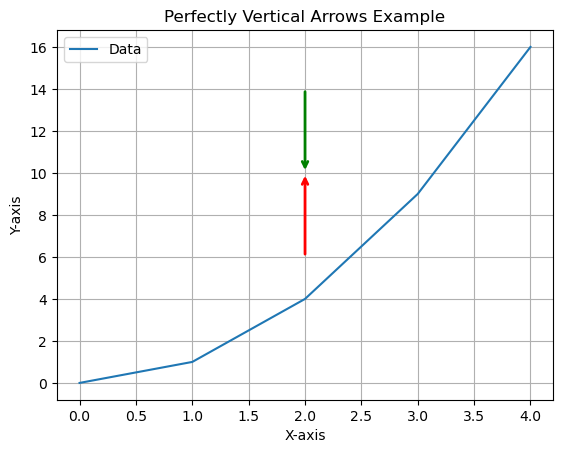

In [9]:
import matplotlib.pyplot as plt

# Example data
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.plot(x, y, label="Data")

# Add an upward vertical arrow
plt.annotate(
    '',                  # Text label
    xy=(2, 10),                # Arrowhead location
    xytext=(2, 14),            # Text location (above the arrowhead)
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        color="green",         # Arrow color
        lw=2                   # Line width
    ),
    ha='center',               # Center the text horizontally
    fontsize=10                # Font size for the text
)

# Add a downward vertical arrow
plt.annotate(
    '',                # Text label
    xy=(2, 10),                # Arrowhead location
    xytext=(2, 6),             # Text location (below the arrowhead)
    arrowprops=dict(
        arrowstyle="->",       # Arrow style
        color="red",           # Arrow color
        lw=2                   # Line width
    ),
    ha='center',               # Center the text horizontally
    fontsize=10                # Font size for the text
)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Perfectly Vertical Arrows Example")
plt.legend()
plt.grid(True)
plt.show()